#### House-Prices---Advanced-Regression-Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

**Loading the Dataset**

In [2]:
data = pd.read_csv(r'data/train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#investigating the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The dataset has no missing values, however some columns such as 'alley' have nan values

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#investigating the columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

**EXPLORATORY DATA ANALYSIS**

In [11]:
#extracting numerical columns
numerical_cols = data.select_dtypes(include=['float', 'int'])

# Getting a list of numerical column names
numerical_col_names = numerical_cols.columns.tolist()
numerical_col_names


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

**Distribution of Numerical columns**

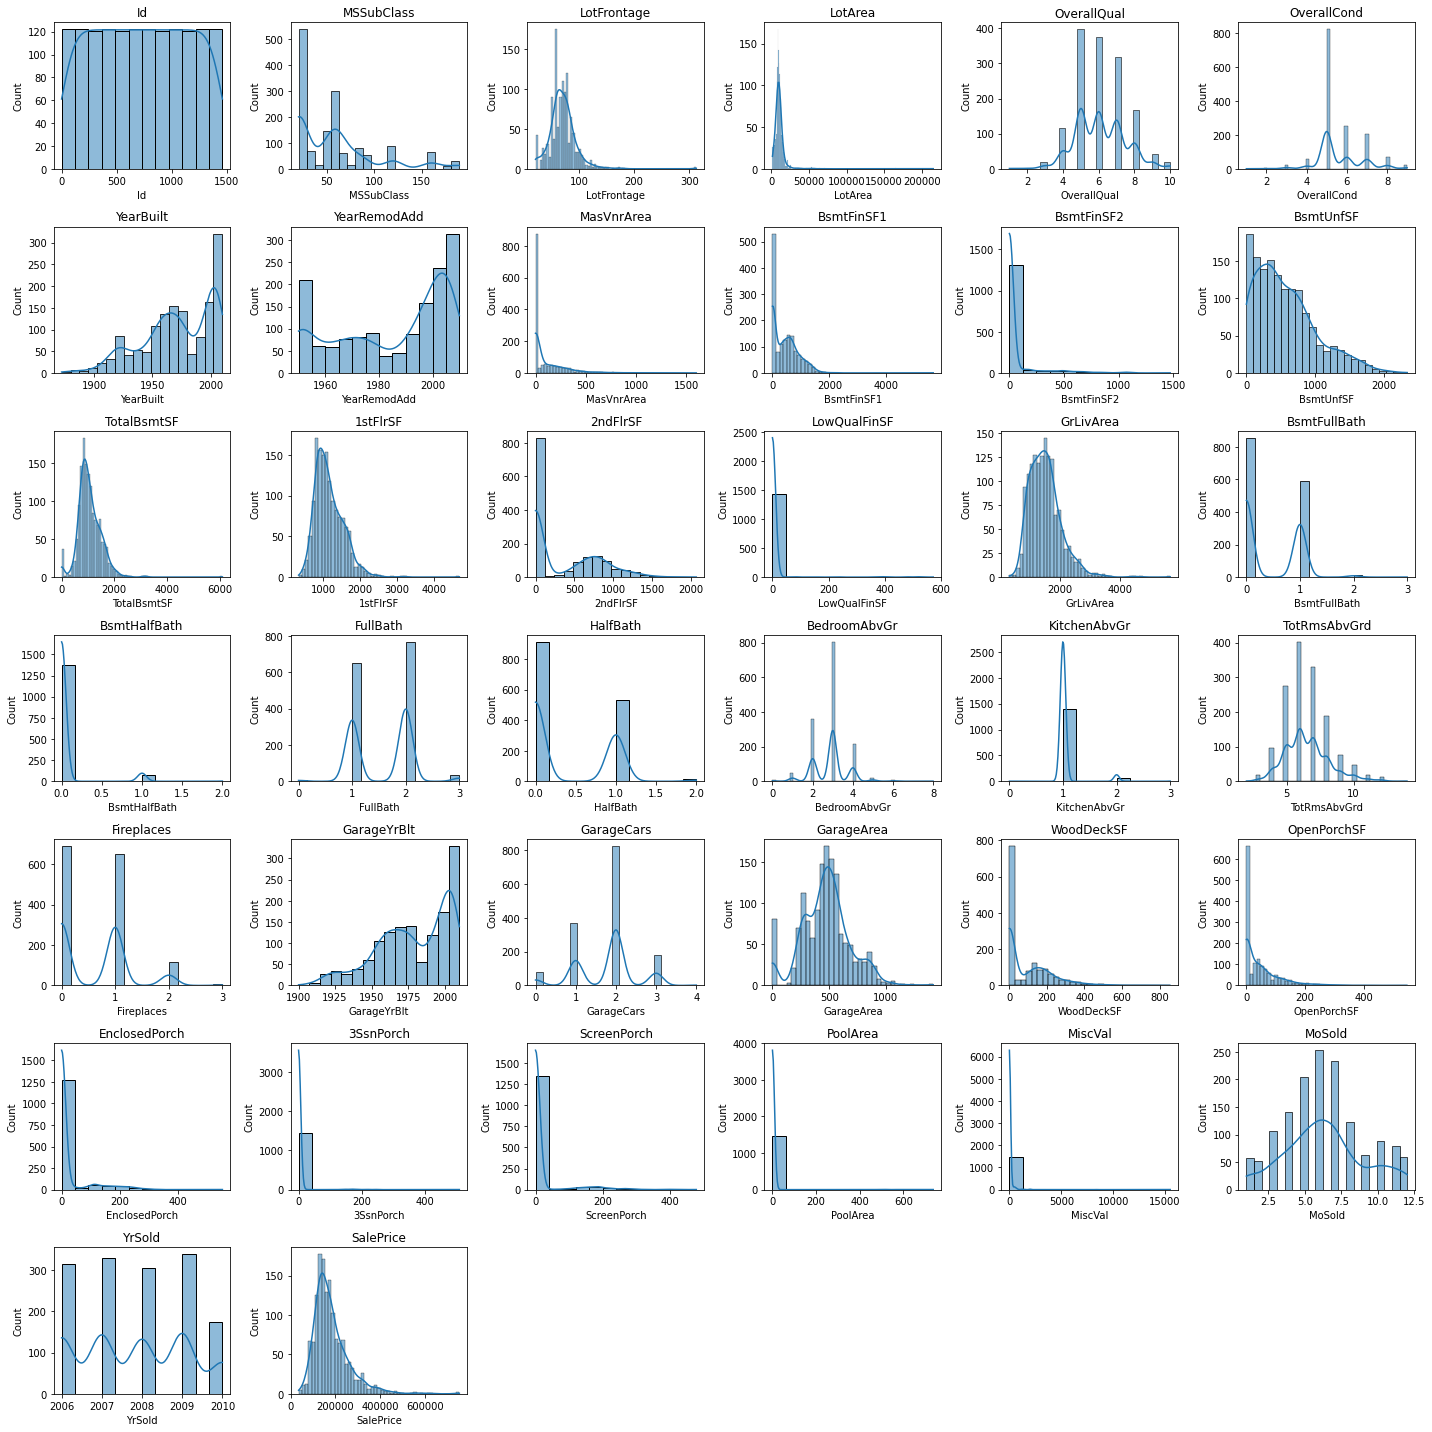

In [13]:

# Plotting histograms for each numerical column
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(7, 6, i)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


*Skewed Distributions:*

Columns like LotArea, MasVnrArea, BsmtFinSF1, GarageArea, WoodDeckSF, PoolArea, and MiscVal show significant right-skewness, indicating that most observations have low values with a few high outliers.
SalePrice also appears right-skewed, suggesting that higher-priced properties are less common.

*Uniform Distributions:*

Id has a uniform distribution because it's likely an identifier with unique values.
MSSubClass and OverallQual show several distinct peaks, suggesting categorical data within a numerical column.

*Symmetric or Nearly Normal Distributions:*

GrLivArea, TotalBsmtSF, and GarageCars have distributions closer to normal but may still exhibit slight skewness.
YearBuilt, YearRemodAdd, and GarageYrBlt are slightly right-skewed but have peaks around the 20th-century period, possibly representing growth trends in property development.

*Binary and Few-Level Distributions:*

Columns such as FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, BsmtFullBath, and BsmtHalfBath have discrete peaks representing low integer values. This reflects features like the number of bathrooms or fireplaces, which often have few levels.

*Seasonal or Categorical Temporal Data:*

MoSold has a somewhat seasonal pattern, with higher sales in specific months, likely due to market cycles.
YrSold appears consistent, without much year-to-year variability, suggesting stable property sales over time.

*Outliers:*

Many distributions indicate potential outliers, especially for features like LotArea, MasVnrArea, and GrLivArea. Outliers may need to be addressed, particularly if they influence the model’s performance.


**EXPLORING CATEGORICAL FEATURES**

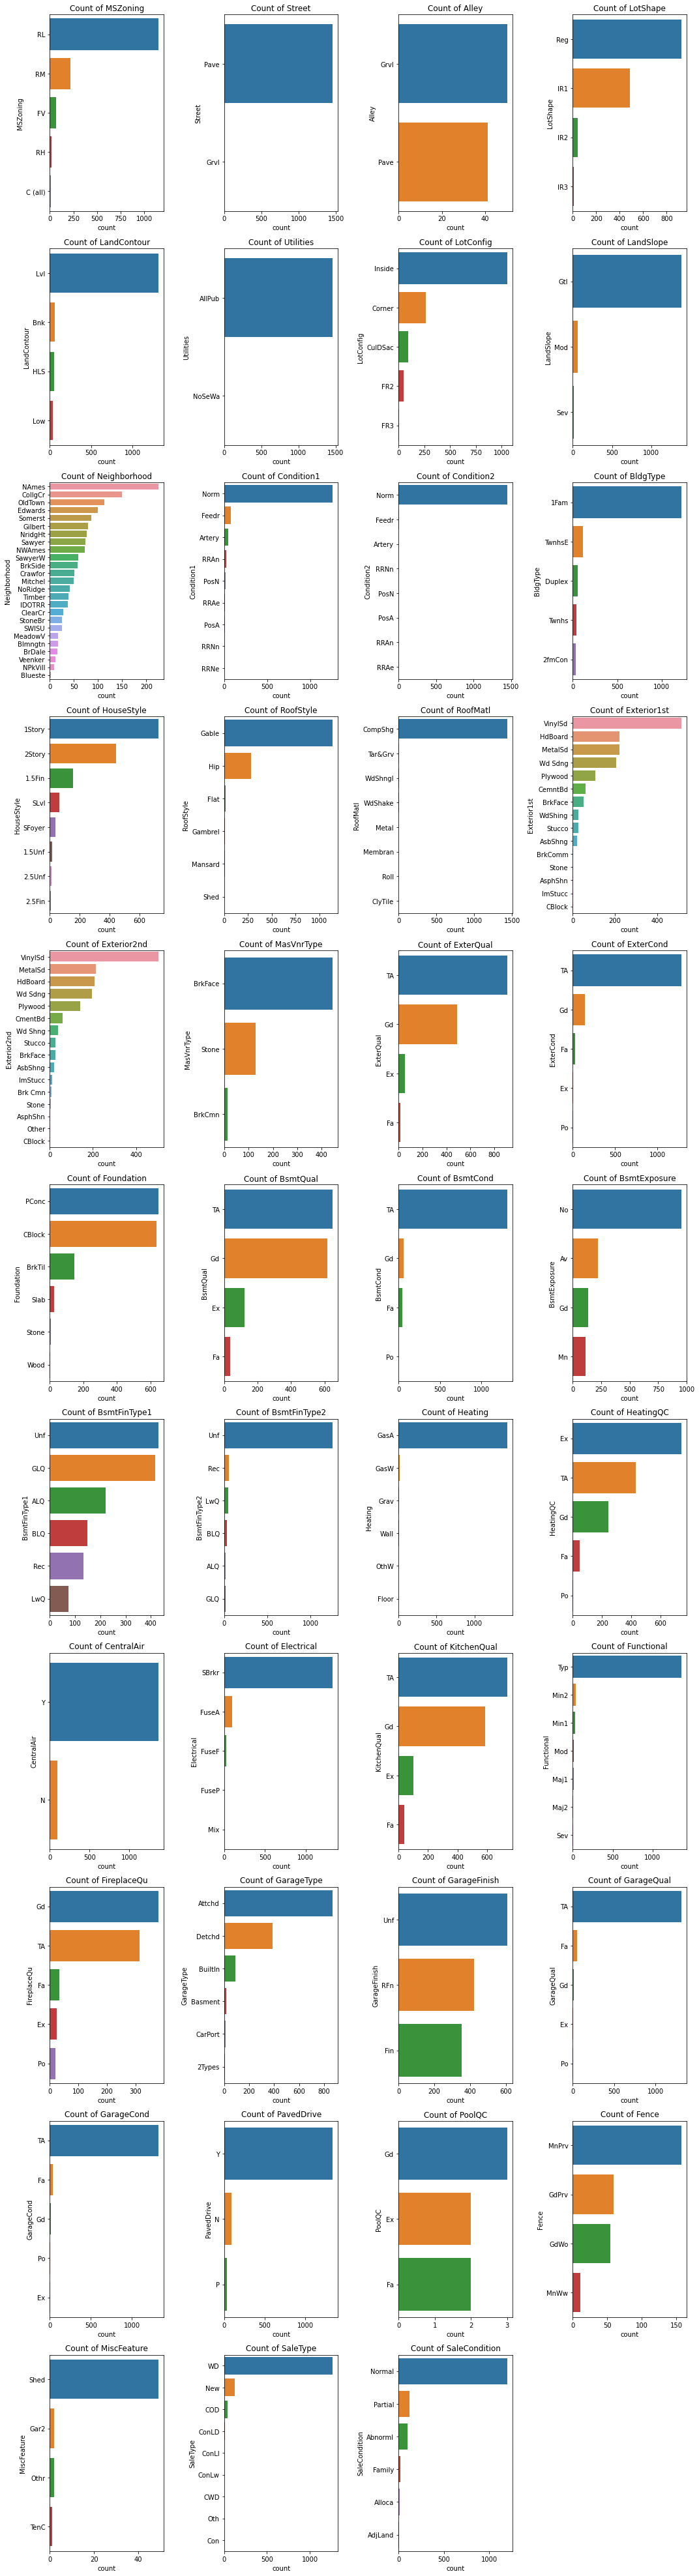

In [16]:
# Categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Determine the grid size based on the number of categorical columns
num_cols = len(categorical_cols)
cols = 4  # Set the number of columns in the grid (adjust if necessary)
rows = (num_cols // cols) + (num_cols % cols > 0)  # Calculate required rows

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=data[col], order=data[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Count of {col}')

# Hide any empty subplots (in case of an odd number of categorical columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


1. Highly Skewed Distributions

Many categorical features have a strong skew, with one category dominating. For instance, some columns show a single large bar, with little representation from other categories.

Examples: Features like "Utilities" or "Street" often show this pattern, as most homes might share the same type of utilities or street access.
Impact: These features may contribute limited information due to their lack of variability, making it harder to differentiate target values. While skewed categories might not be very helpful on their own, they could still be useful in combination with other features.

2. High Cardinality Categorical Features

Some plots display a wide range of unique values (many small bars), indicating high cardinality, or numerous distinct categories within a feature.

Examples: Features like "Neighborhood" or "Condition" often have many unique values.
Impact: High-cardinality features can be tricky to process in models. Direct encoding, such as one-hot encoding, can lead to sparse matrices and high computational costs. Target encoding or dimensionality reduction may work better for these features.

3. Moderately Balanced Distributions

Some features have a fairly balanced distribution, with multiple categories at similar count levels. This balance can help differentiate classes in the target variable.

Examples: Features like "Exterior Quality" or "Foundation Type" may show this balance, as these attributes vary more across homes.
Impact: Balanced distributions provide diverse categories that aid in model learning without any one category dominating. These features are often well-suited for direct encoding.

4. Sparse or Rare Categories

Some plots include many bars with low counts, representing categories that occur infrequently. These rare categories could reflect uncommon conditions, materials, or designs.

Examples: Features like "Condition" or "Roof Material" might include rare categories, shown as thin bars in the chart.
Impact: Sparse categories can add noise and potentially lower model performance due to their limited occurrences. Grouping these into an "Other" category or using special encoding methods can help prevent overfitting.

5. Data Quality Issues

Some distributions may expose data quality issues, like categories with no data (empty bars), unusual patterns, or unexpectedly high counts for a single category. These issues might stem from data entry errors, missing data, or collection inconsistencies.

Examples: An empty or near-empty bar in a feature that should be well-represented (e.g., "House Style") might signal missing values or data entry mistakes.
Impact: It's useful to investigate these anomalies, as they could introduce bias or reduce model reliability if unaddressed. Missing or incorrect values may need to be fixed through imputation, exclusion, or correction.

6. Dominant Features in Prediction

Some categorical features, while skewed, could still be informative if they represent essential attributes. For instance, a feature like "Heating" might be dominated by one type, with a minority using a more efficient or premium type, which could be relevant for predicting things like house prices.

Impact: Though skewed, certain dominant features can have predictive value, especially if rare categories represent premium aspects (e.g., high-end materials). Feature engineering, such as adding binary indicators for rare categories, can help use these features effectively.

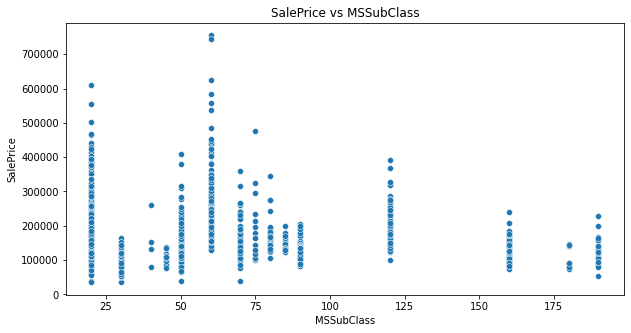

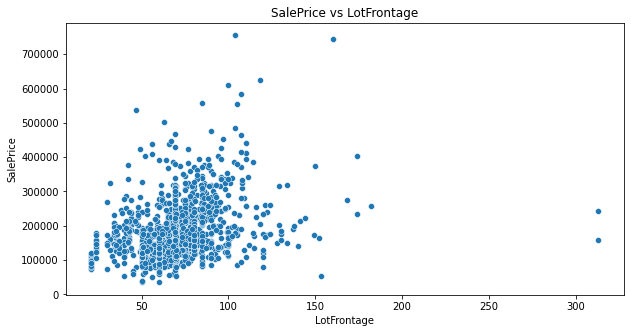

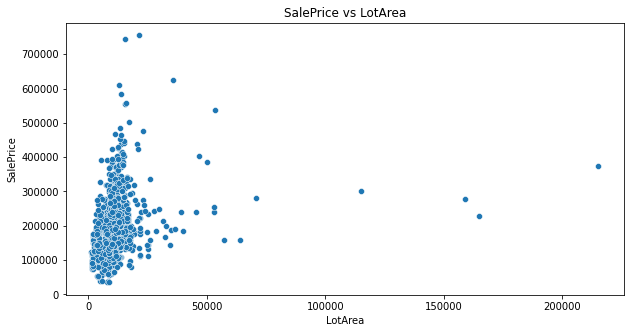

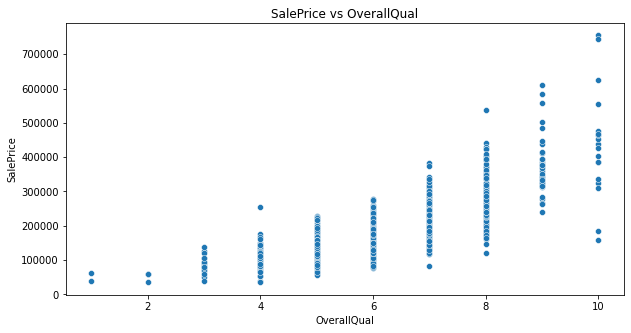

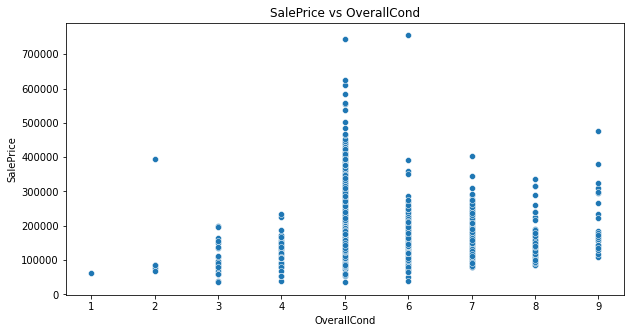

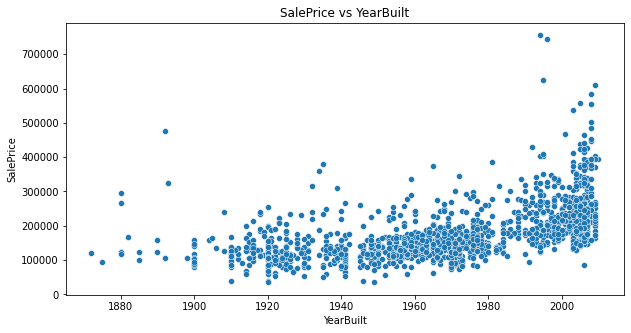

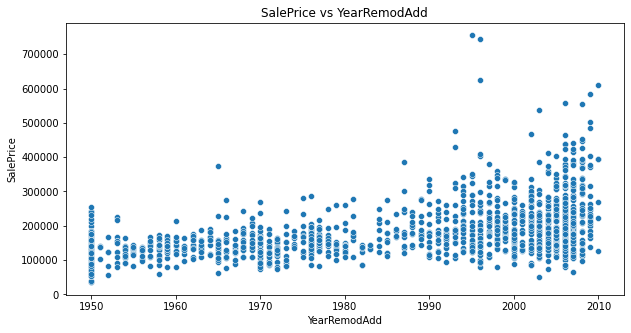

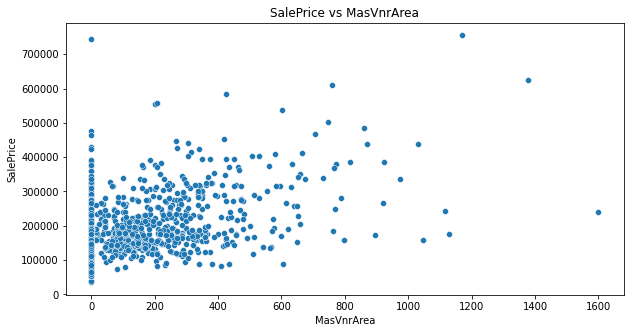

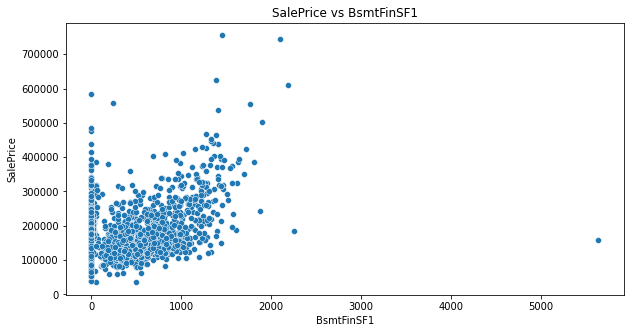

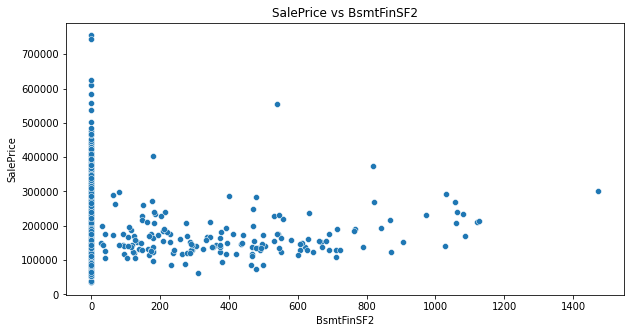

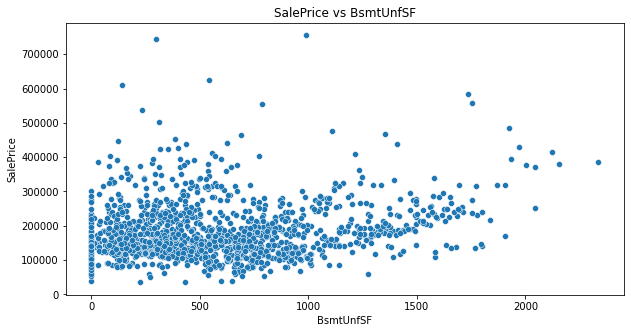

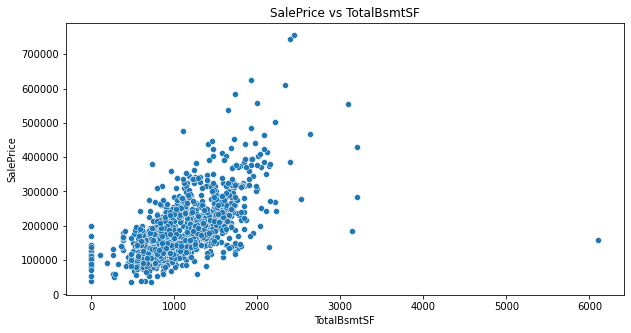

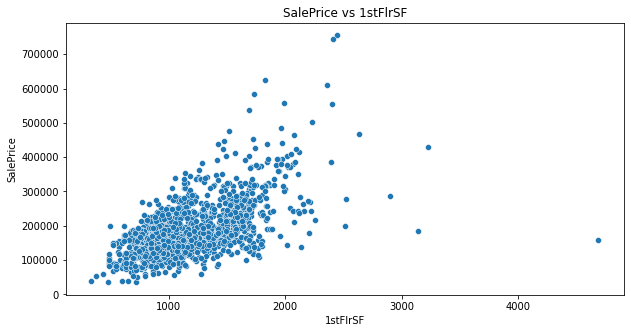

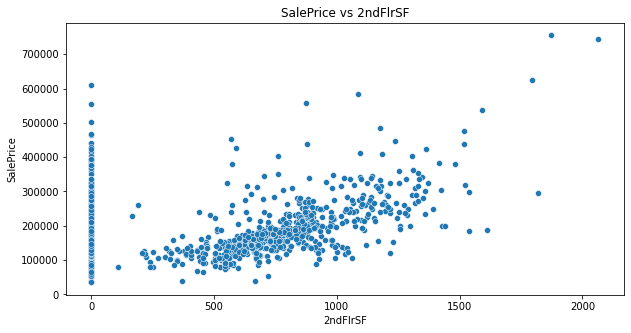

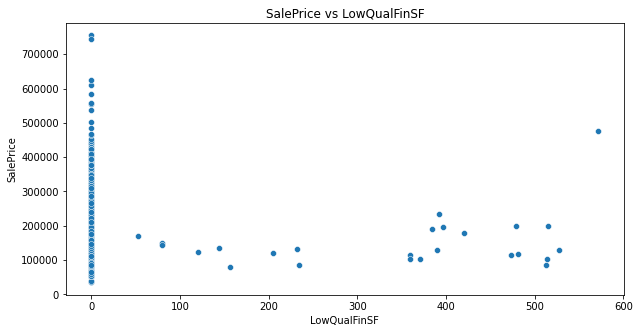

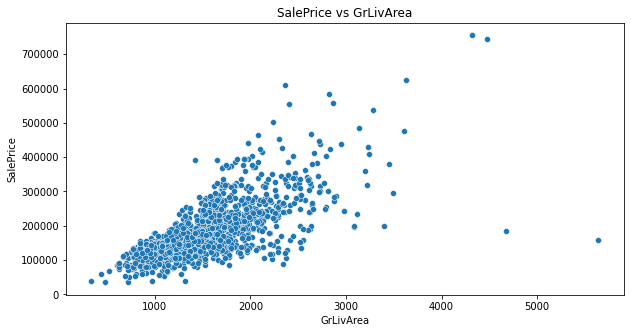

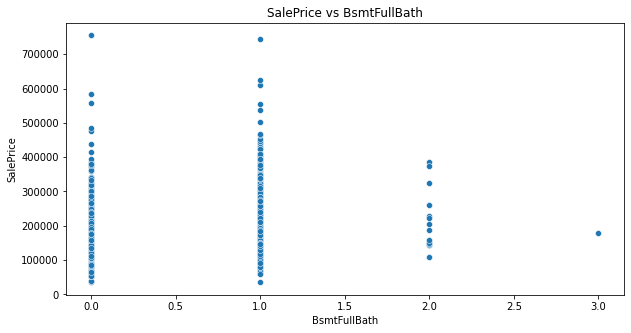

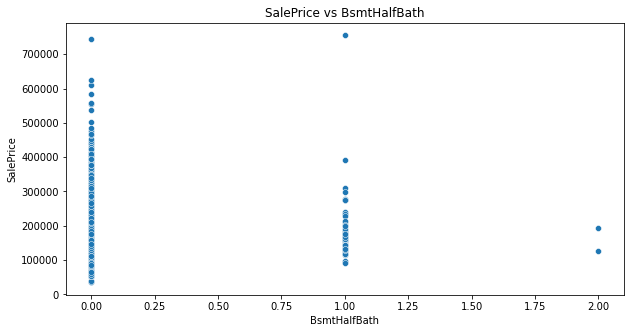

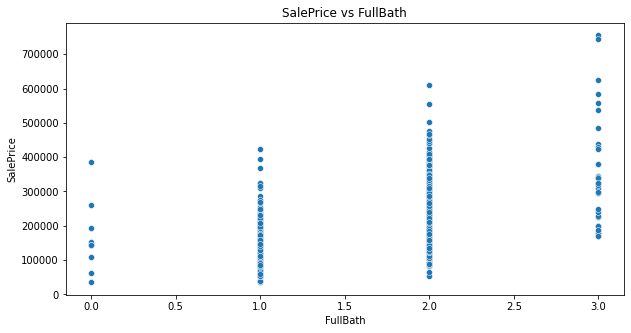

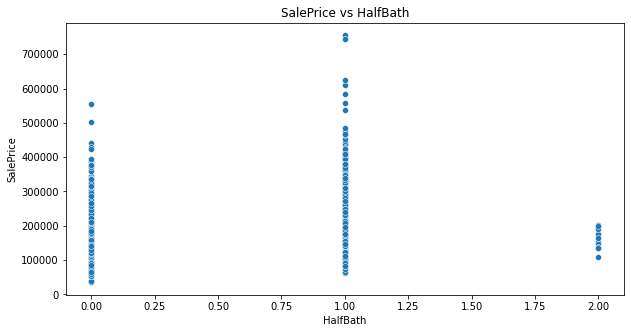

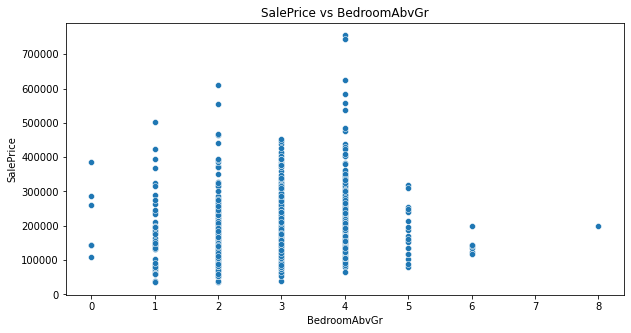

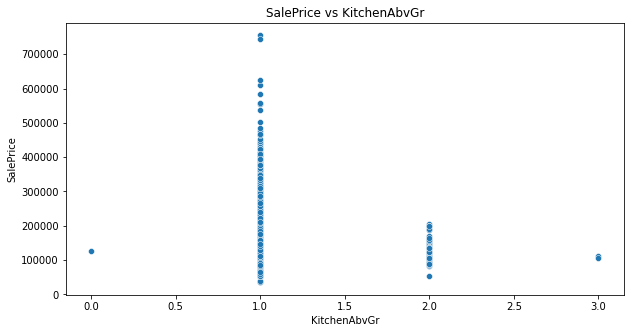

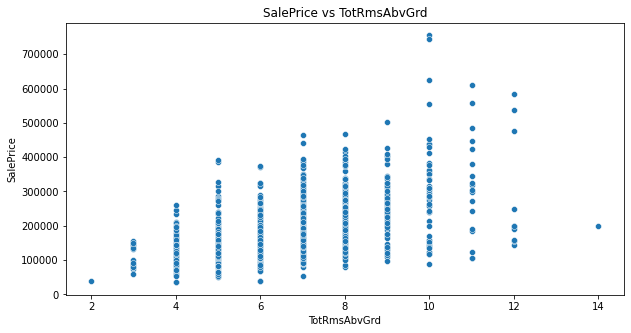

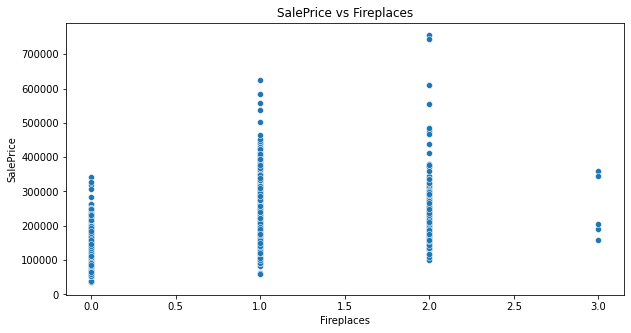

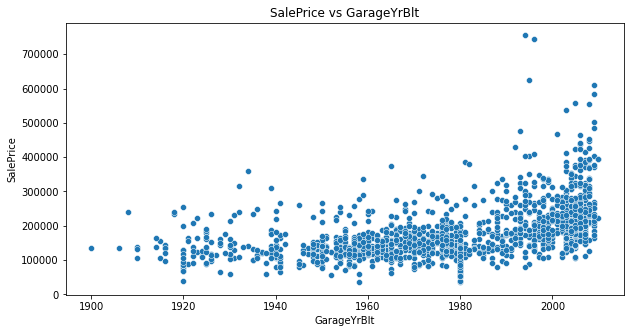

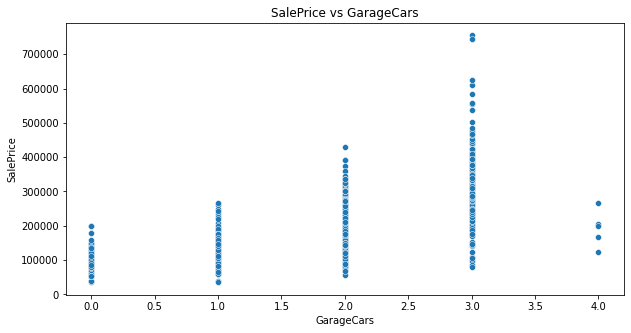

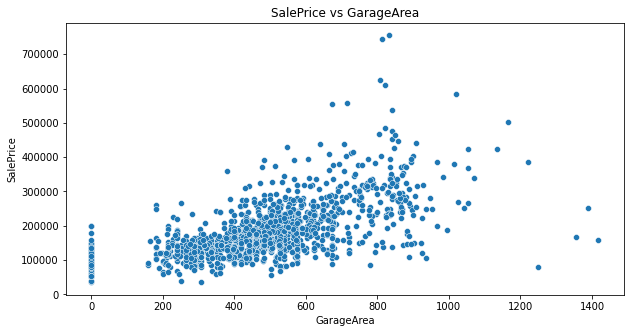

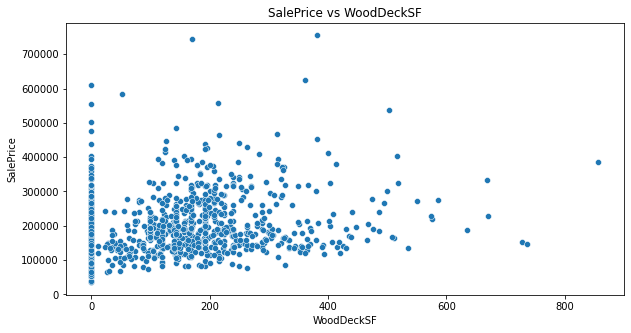

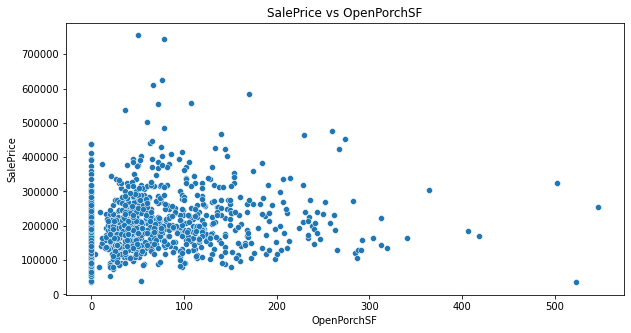

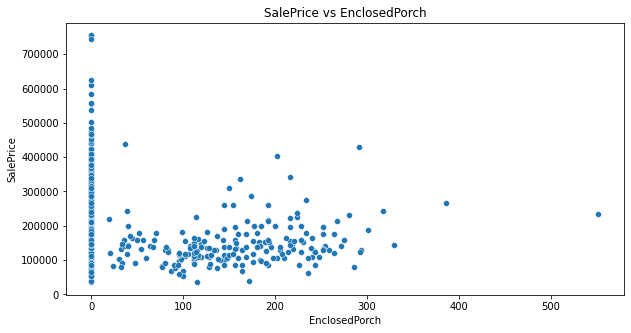

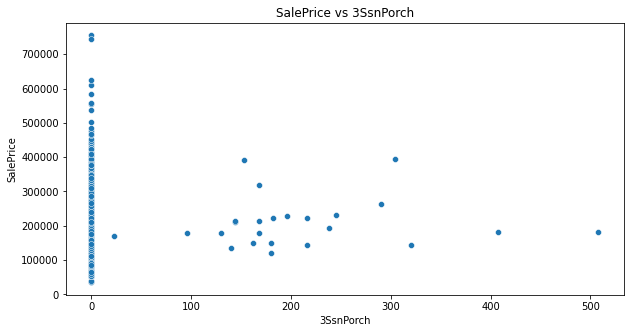

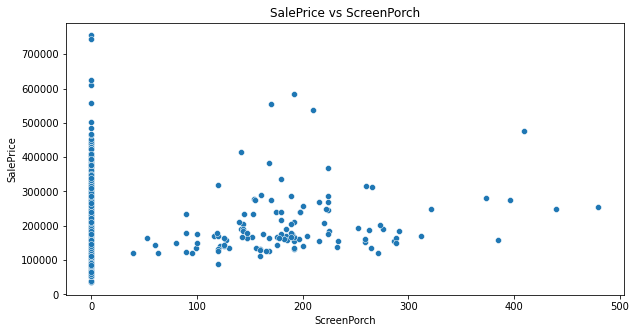

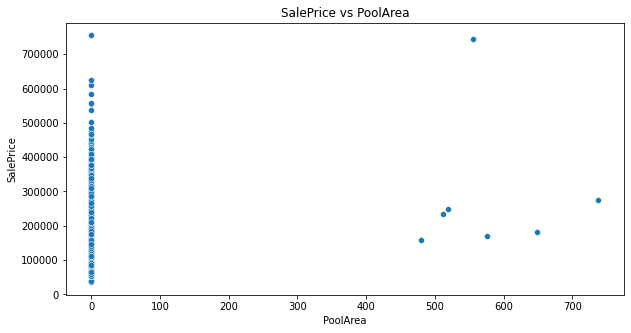

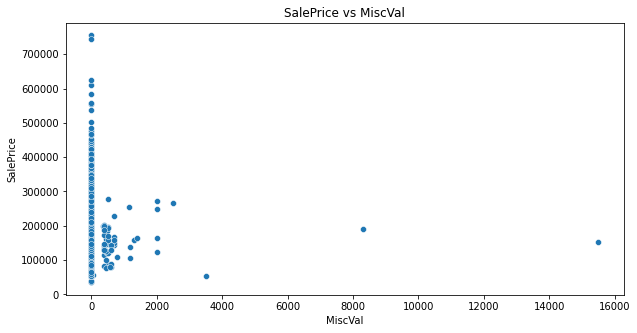

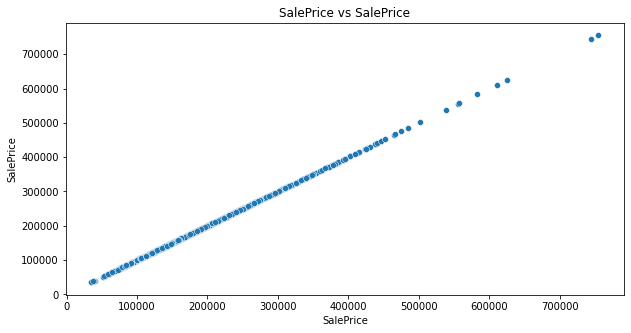

In [15]:
# Scatter plots for continuous variables
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=data[col], y=data['SalePrice'])
    plt.title(f'SalePrice vs {col}')
    plt.savefig(f"Visualisations/{col}_scatterplot.png", format="png", dpi=300)
    plt.show()

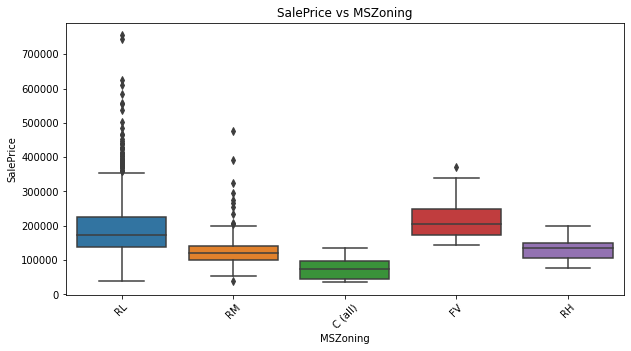

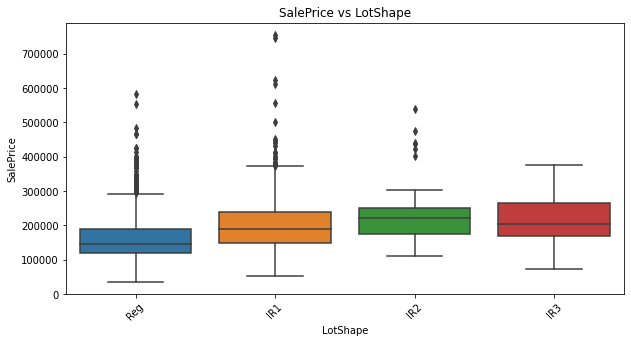

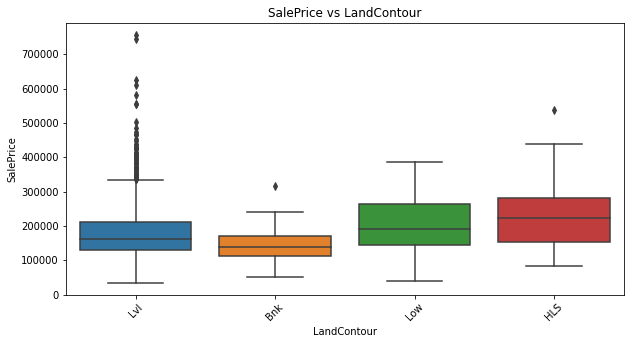

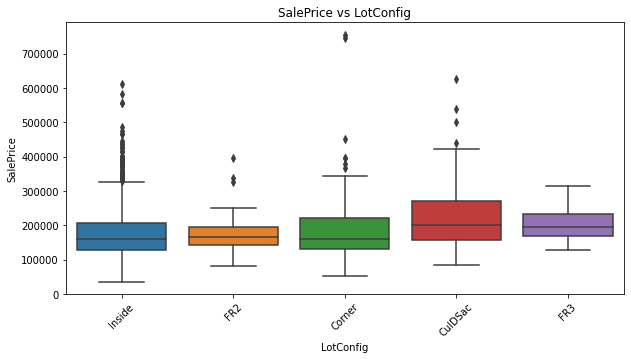

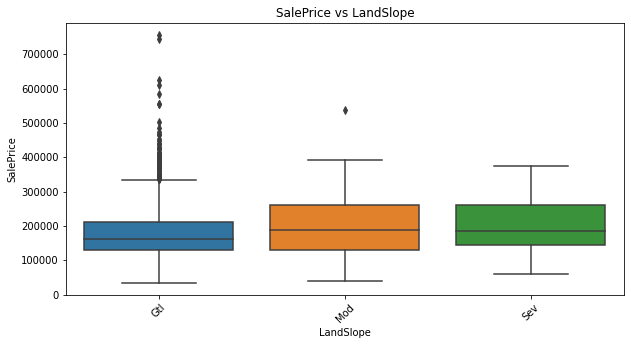

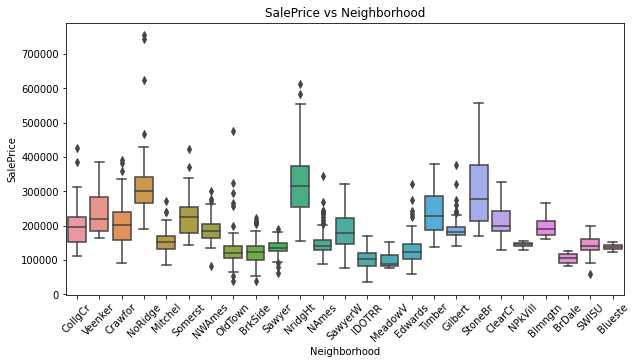

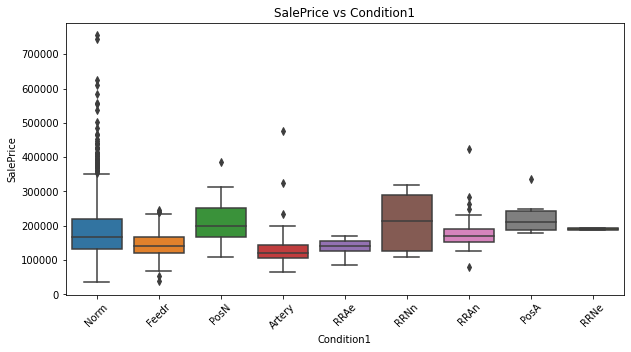

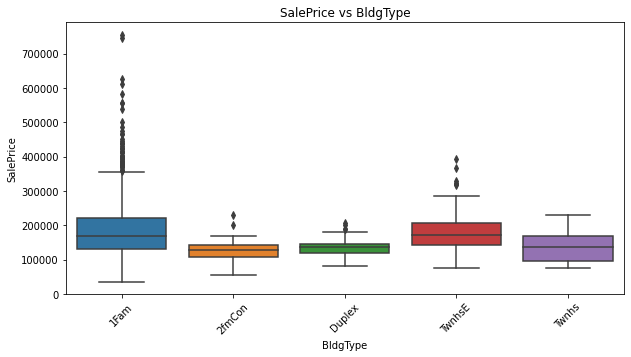

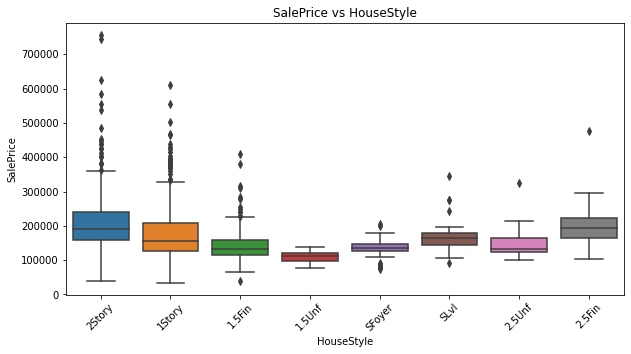

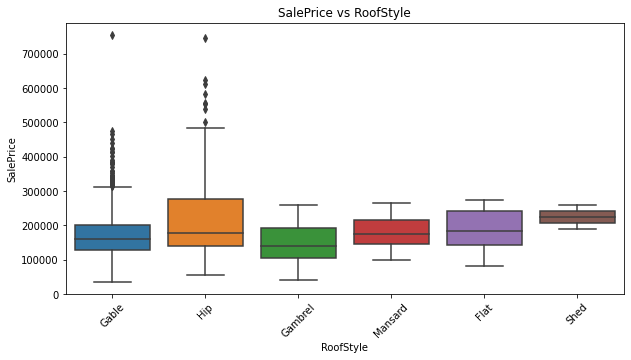

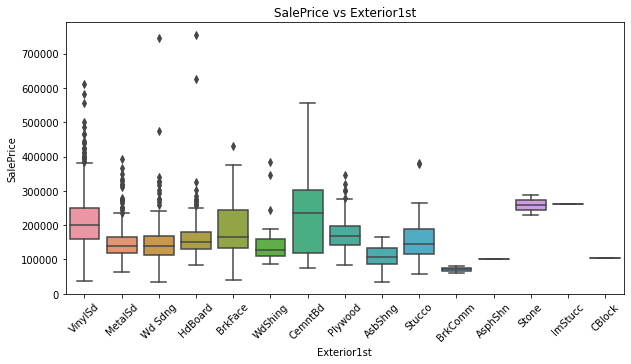

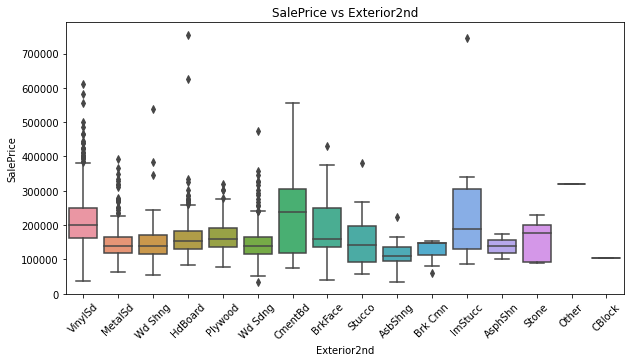

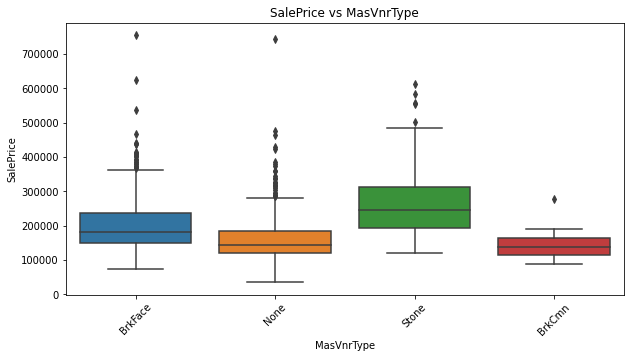

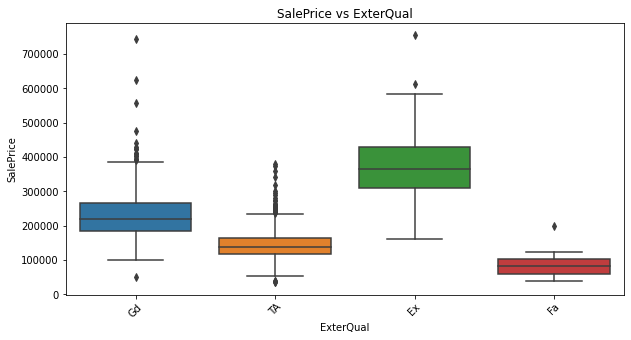

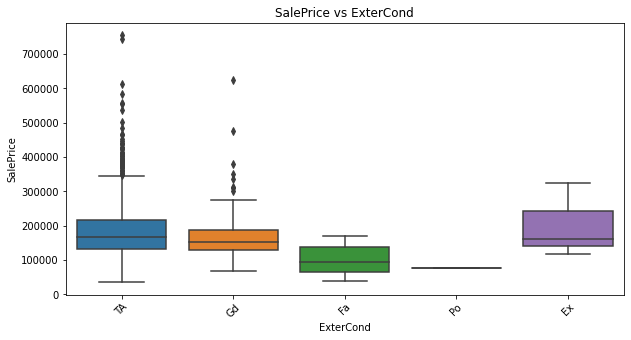

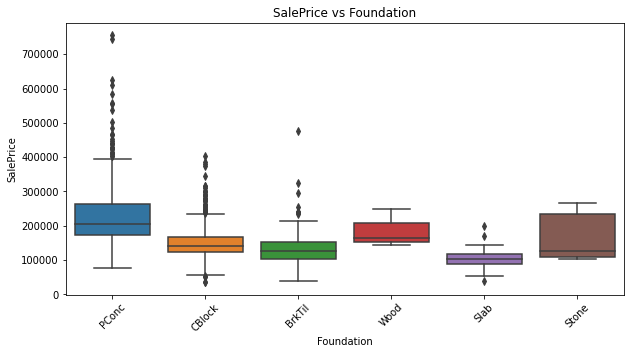

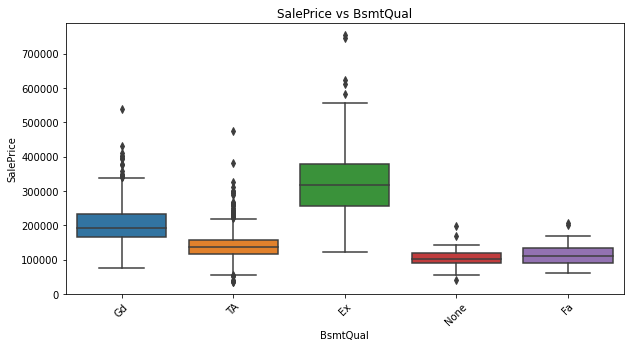

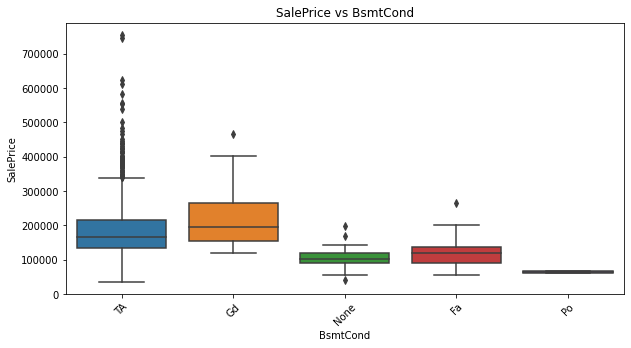

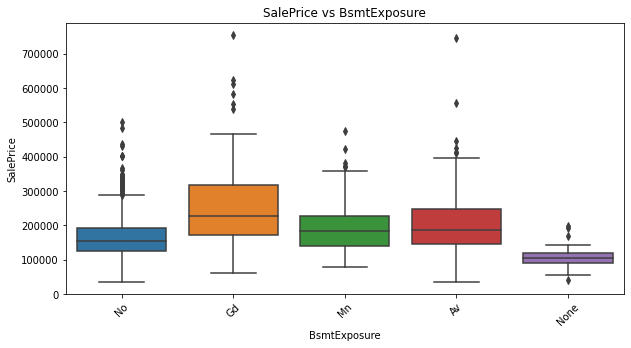

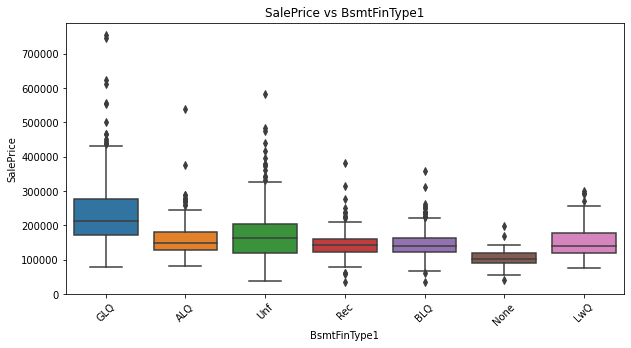

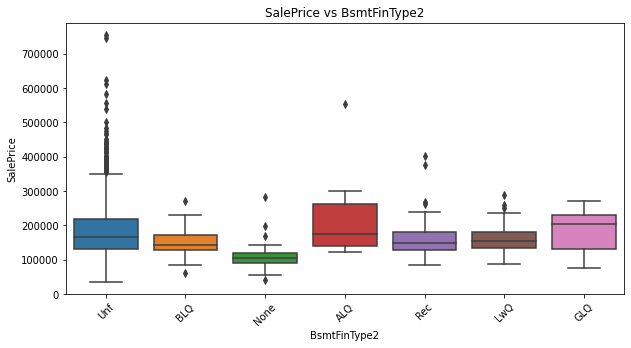

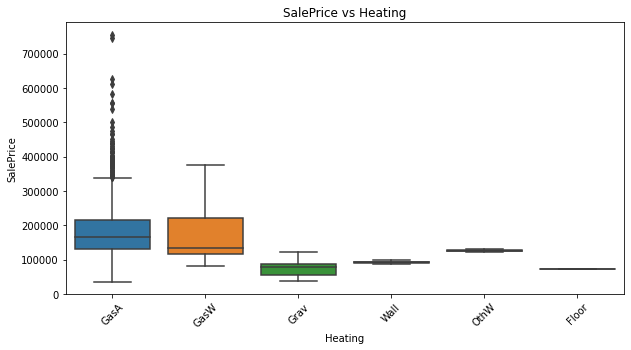

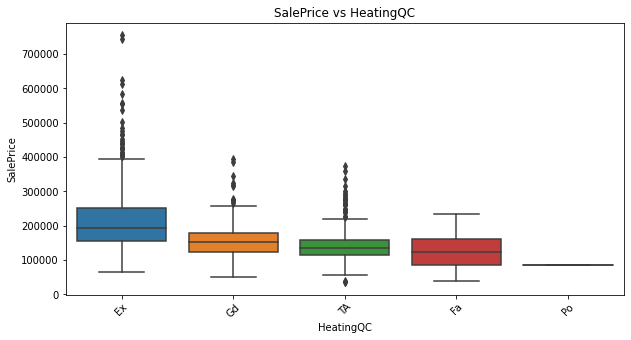

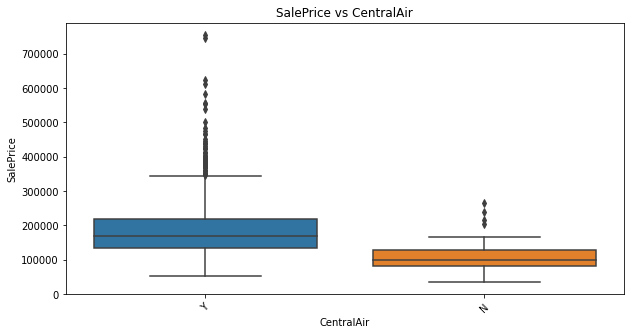

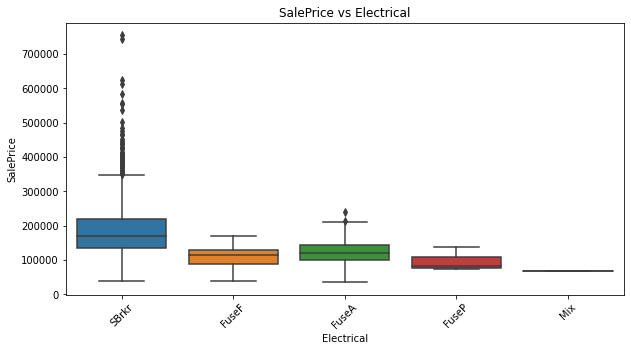

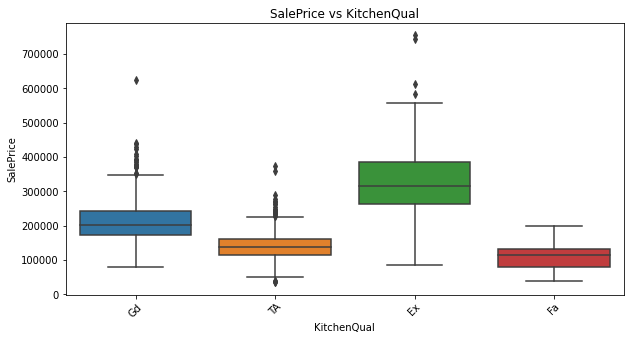

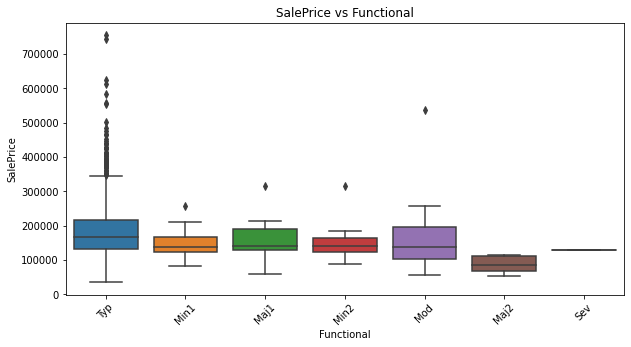

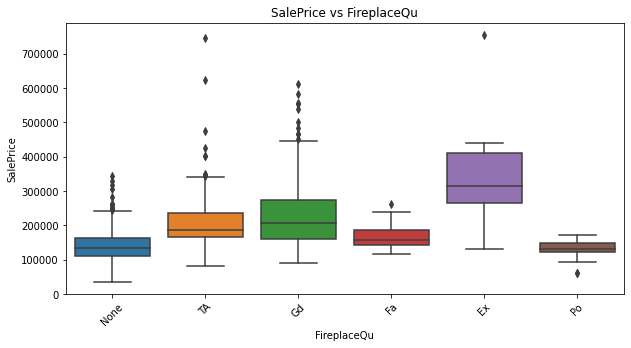

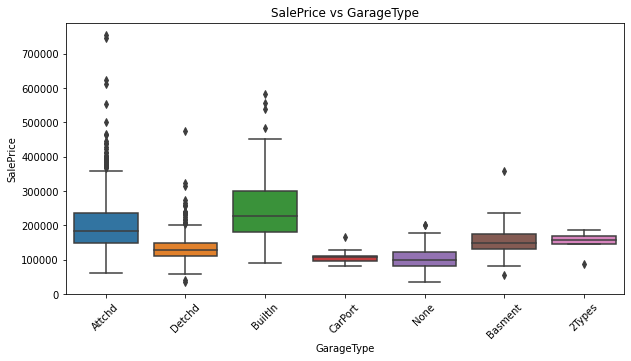

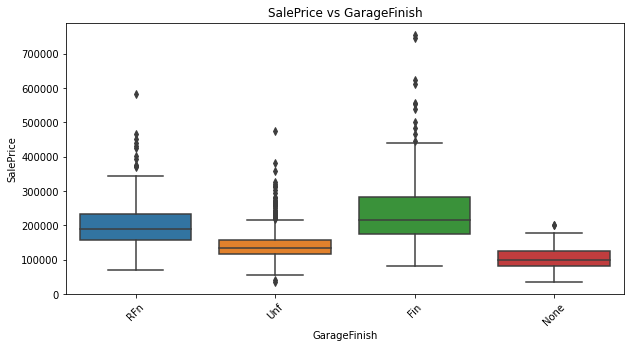

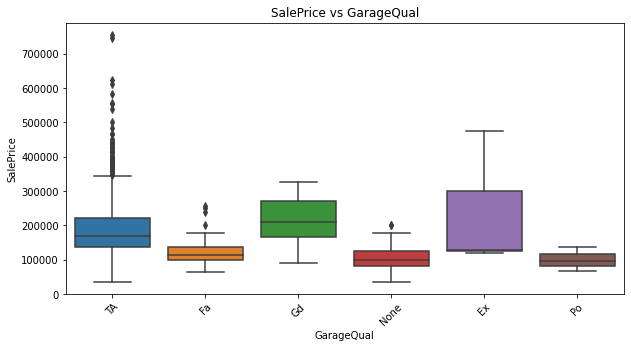

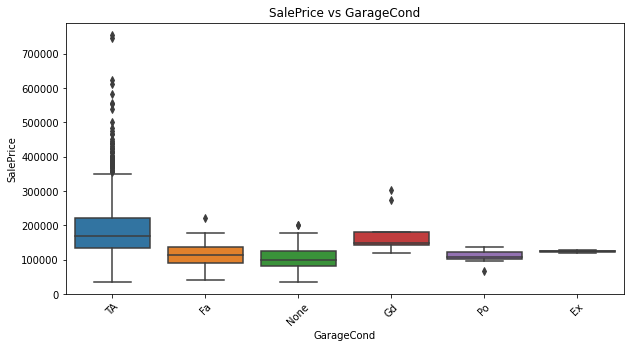

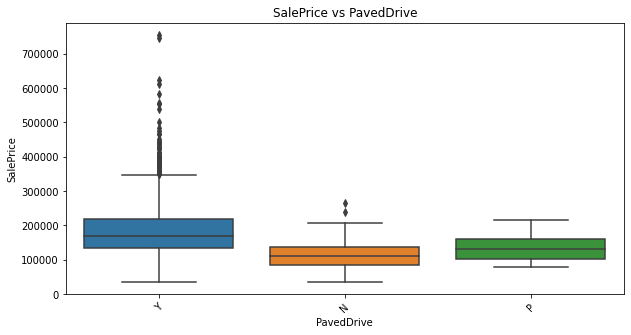

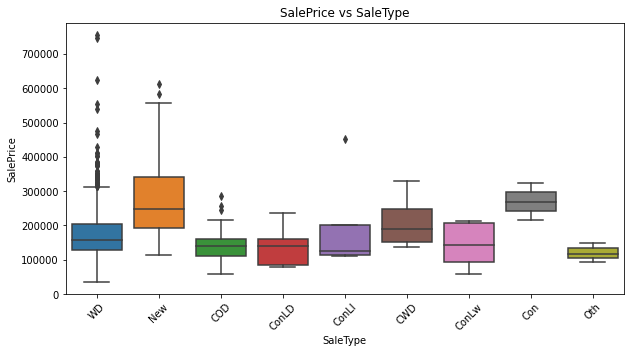

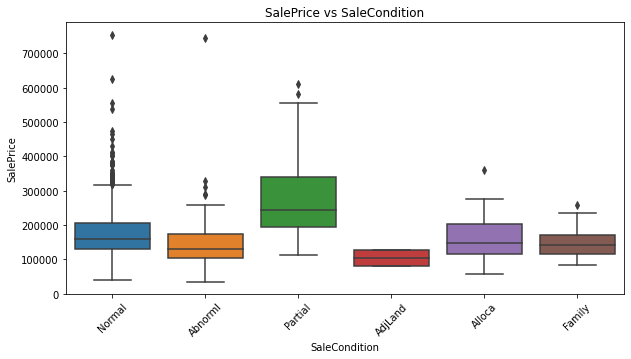

In [16]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[col], y='SalePrice', data=data)
    plt.title(f'SalePrice vs {col}')
    plt.xticks(rotation=45)
    plt.show()

**DATA PREPROCESSING**

In [18]:
# Separate features and target variable
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipelines
# Pipeline for numerical data: filling missing values and scaling
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for categorical data: encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Final preprocessing pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform training data
X_train_preprocessed = model_pipeline.fit_transform(X_train)
X_test_preprocessed = model_pipeline.transform(X_test)

print("Preprocessing complete. Training and test sets are ready for modeling.")


Preprocessing complete. Training and test sets are ready for modeling.


In [36]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,61,0,0,0,0,0,WD,Normal
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,298,0,0,0,0,0,0,WD,Normal
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,42,0,0,0,0,0,WD,Normal
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Y,0,35,272,0,0,0,0,WD,Abnorml
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,Y,192,84,0,0,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,Y,0,40,0,0,0,0,0,WD,Normal
1456,20,RL,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,Y,349,0,0,0,0,0,0,WD,Normal
1457,70,RL,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,Y,0,60,0,0,0,0,2500,WD,Normal
1458,20,RL,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,Y,366,0,112,0,0,0,0,WD,Normal


**BASELINE LINEAR REGRESSION MODEL**

In [20]:

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test_preprocessed)
print("Linear Regression - RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))
print("Linear Regression - R^2:", r2_score(y_test, y_pred_lr))


Linear Regression - RMSE: 32376.751449678675
Linear Regression - R^2: 0.8633364467013083


**DECISION TREE REGRESSOR**

In [21]:


# Initialize and train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_dt = dt_model.predict(X_test_preprocessed)
print("Decision Tree - RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("Decision Tree - R^2:", r2_score(y_test, y_pred_dt))


Decision Tree - RMSE: 43119.39748456032
Decision Tree - R^2: 0.7576006040408878


**RANDOM FOREST REGRESSOR**

In [22]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test_preprocessed)
print("Random Forest - RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("Random Forest - R^2:", r2_score(y_test, y_pred_rf))


Random Forest - RMSE: 29008.64189932784
Random Forest - R^2: 0.8902913276289411


**GRADIENT BOOSTING REGRESSOR**

In [23]:
# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_gb = gb_model.predict(X_test_preprocessed)
print("Gradient Boosting - RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("Gradient Boosting - R^2:", r2_score(y_test, y_pred_gb))


Gradient Boosting - RMSE: 27776.632451247733
Gradient Boosting - R^2: 0.8994121906303318


**XGBOOST REGRESSOR**

In [24]:
# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test_preprocessed)
print("XGBoost - RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("XGBoost - R^2:", r2_score(y_test, y_pred_xgb))


XGBoost - RMSE: 29521.754460431377
XGBoost - R^2: 0.8863758902971598


**LASSO REGRESSION**

In [25]:
# Initialize and train the model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_lasso = lasso_model.predict(X_test_preprocessed)
print("Lasso - RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("Lasso - R^2:", r2_score(y_test, y_pred_lasso))


Lasso - RMSE: 32366.826740086155
Lasso - R^2: 0.8634202190460766


c:\Users\hp\anaconda\envs\learn-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50294907263.70776, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(


**RIDGE REGRESSION**

In [26]:
# Initialize and train the model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_preprocessed, y_train)

# Make predictions and evaluate
y_pred_ridge = ridge_model.predict(X_test_preprocessed)
print("Ridge - RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))
print("Ridge - R^2:", r2_score(y_test, y_pred_ridge))


Ridge - RMSE: 31669.843204455825
Ridge - R^2: 0.8692390725631692
